In [1]:
import csv
from sklearn.decomposition import NMF
import numpy as np
import pandas as pd
from sklearn.metrics import adjusted_mutual_info_score
import matplotlib.pyplot as plt
import math
from random import choices, randrange

In [2]:
#reads the csv data file and removes headers and other miscellaneous labels
df = pd.read_csv("data.csv",header=0)
df = df.drop(df.columns[0],1)

In [3]:
#transpose data so that samples are columns of the matrix
np_data = df.values
np_data = np.transpose(np_data)

In [4]:
#setting K for NMF
num = 5

In [5]:
model = NMF(n_components=num, init="random", solver="cd", verbose=False)

In [6]:
W = model.fit_transform(np_data)
H = model.components_

In [7]:
#assigning predicted labels based on the index of the max value in each column
predicted_labels = []
for x in range(H[0].size):
    current_sample = list(H[:,x])
    predicted_labels.append(current_sample.index(max(current_sample)))

In [8]:
#determine the ground truth labels for each column from the csv file
numeric_labels = {"PRAD":0, "LUAD":1, "BRCA":2, "KIRC":3, "COAD":4}
ground_truth = []

with open("labels.csv","r") as f:
    datafile = csv.reader(f)
    first = True
    for row in datafile:
        if first: first = not first; continue
        label = str(row[1])
        ground_truth.append(numeric_labels[label])

In [9]:
#calculating the adjusted mutual info score/error
adjusted_mutual_info_score(ground_truth,predicted_labels,"arithmetic")

0.8734379758520621

In [10]:
#plotting the results with color as the ground truth and coordinate randomly assigned based on predicted label
angle_range = [0]
for i in range(num):
    count = predicted_labels.count(i)
    angle_range.append(int(count / len(predicted_labels) * 360 + angle_range[-1]))

In [11]:
colors = {0:"orange", 1:"green", 2:"blue", 3:"magenta", 4:"red"}  # colors assigned based on ground truth

In [12]:
def weighted_random():
    #used a weighted random method so that the points are not too densly clustered in the center of the circle
    rands = range(0, 1000)
    weights = range(0, 1000)
    
    return choices(rands, weights=weights)[0] / 1000

In [13]:
#assigning point coordinates and color
coords = {}
for i in range(len(predicted_labels)):
    a = randrange(angle_range[predicted_labels[i]],angle_range[predicted_labels[i] + 1]) * math.pi / 180
    r = weighted_random()
    
    coords[r * math.cos(a), r * math.sin(a)] = colors[ground_truth[i]]

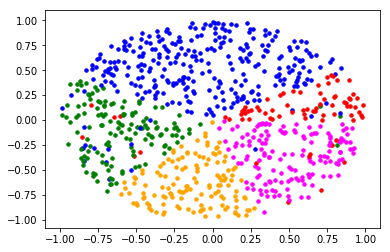

In [14]:
#plot
keys = tuple(coords.keys())

for index in range(len(keys)):
    plt.scatter(keys[index][0], keys[index][1], color=coords[keys[index]], s=12)